# Import all needed Libraries/Module

In [62]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

In [81]:
data = pd.read_csv('../Data/drop_BMI.csv')
data

,age,weight(kg),height(m),gender,BMR,activity_level,calories_to_maintain_weight
0,2,16.097862,0.932025,1,958.584,1.2,1150.3008
1,4,14.619374,0.916687,1,932.383,1.7,1585.0511
2,4,17.899918,0.997288,1,977.578,1.9,1857.3982
3,3,13.532880,1.022786,1,944.689,1.9,1794.9091
4,4,17.039484,1.053977,0,799.229,1.9,1518.5351
...,...,...,...,...,...,...,...
10721,72,95.444236,1.631113,1,1510.154,1.3,1963.2002
10722,85,97.976899,1.631409,1,1473.418,1.7,2504.8106
10723,50,97.761259,1.631864,1,1635.925,1.7,2781.0725
10724,57,96.829324,1.631290,1,1593.981,1.3,2072.1753


In [82]:
x=data.drop('calories_to_maintain_weight',axis=1)
y=data['calories_to_maintain_weight']

Normalization dapat mengontrol proses normalisasi secara fleksibel, seperti menentukan nilai rata-rata dan deviasi standar yang diinginkan, atau menggunakan statistik empiris dari data pelatihan. Normalisasi ini membantu dalam menjaga skala data yang konsisten, mempercepat konvergensi model, dan menghindari masalah gradien yang tidak stabil.

In [83]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization(input_shape=(x.shape[1],),axis=-1)
normalizer.adapt(np.array(x))
print(normalizer.mean.numpy())

[2.6778576e+01 6.1647728e+01 1.5402758e+00 5.1948535e-01 1.4420499e+03
 1.4874511e+00]


In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape,y_train.shape

((8580, 6), (8580,))

In [93]:
model = tf.keras.Sequential([normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1),
])
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),)
history=model.fit(x_train, y_train, epochs=200, batch_size=4,
                  validation_split=0.2)

Epoch 1/200
1716/1716 [==============================] - 3s 2ms/step - loss: 1218.9484 - val_loss: 314.4807
Epoch 2/200
1716/1716 [==============================] - 3s 2ms/step - loss: 136.3123 - val_loss: 92.2502
Epoch 3/200
1716/1716 [==============================] - 3s 2ms/step - loss: 78.6294 - val_loss: 66.5444
Epoch 4/200
1716/1716 [==============================] - 3s 2ms/step - loss: 58.5890 - val_loss: 52.5916
Epoch 5/200
1716/1716 [==============================] - 3s 2ms/step - loss: 47.3178 - val_loss: 46.2177
Epoch 6/200
1716/1716 [==============================] - 3s 2ms/step - loss: 40.0176 - val_loss: 37.4869
Epoch 7/200
1716/1716 [==============================] - 3s 2ms/step - loss: 35.4217 - val_loss: 35.2998
Epoch 8/200
1716/1716 [==============================] - 3s 2ms/step - loss: 32.4166 - val_loss: 31.7014
Epoch 9/200
1716/1716 [==============================] - 3s 2ms/step - loss: 30.0515 - val_loss: 31.0668
Epoch 10/200
1716/1716 [===========================

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_loss(history,start,end):
  x_index=[x for x in range (start,end)]
  plt.plot(x_index,history.history['loss'][start-1:end-1], label='loss')
  plt.plot(x_index,history.history['val_loss'][start-1:end-1], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss MAE')
  plt.title(f'Loss betweeh epoch {start} and {end}')
  plt.legend()
  plt.grid(True)
  plt.show()

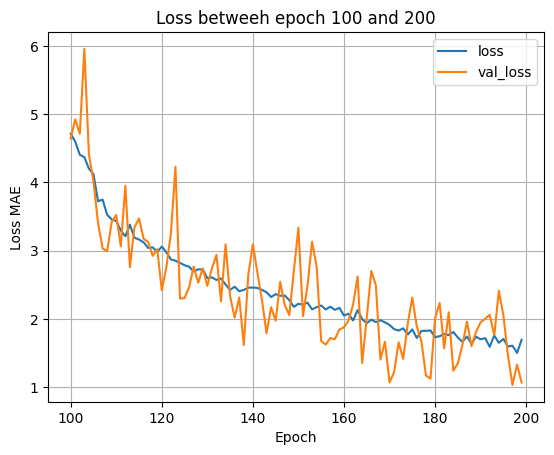

In [95]:
plot_loss(history,100,200)

In [96]:
model.evaluate(x_test,y_test)

68/68 [==============================] - 0s 1ms/step - loss: 2.1009


2.1009304523468018

In [97]:
predict=model.predict(x_test)
predict.squeeze()

array([1528.0311, 1811.4598, 1468.2898, ..., 2100.8398, 2079.6528,
       1452.4075], dtype=float32)

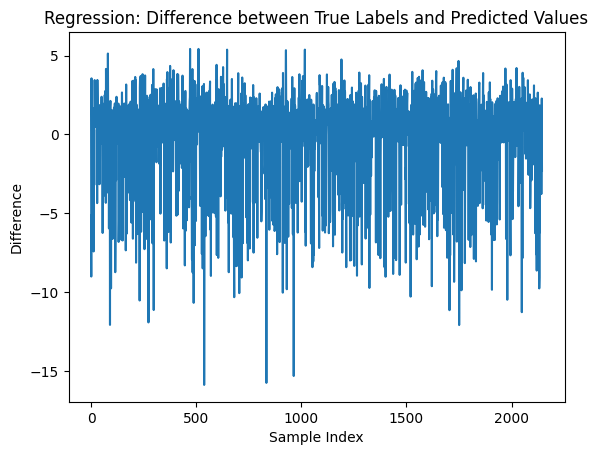

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your true labels in a NumPy array called 'y_true'
# Assuming you have your predicted values in a NumPy array called 'y_pred'

# Calculate the difference between true labels and predicted values
diff = y_test - predict.squeeze()

# Plotting the difference
plt.plot(np.arange(len(diff)), diff)
plt.xlabel('Sample Index')
plt.ylabel('Difference')
plt.title('Regression: Difference between True Labels and Predicted Values')
plt.show()


In [99]:
diff.describe()

count    2146.000000
mean       -0.164684
std         2.965435
min       -15.859123
25%        -0.645355
50%         0.700342
75%         1.633839
max         5.417024
Name: calories_to_maintain_weight, dtype: float64

hasil= y true - predict

* y true= data asli -> y_test
* predict= data prediksi -> hasil predict model terhadap x_test

if hasil<0 -> kalori yg diprediksi berlebihan

if hasil >0 -> kalori yg diprediksi kurang

In [100]:
sorted(diff) #jumlah kalori yang diprediksi berlebih

[-15.859123046875084,
 -15.730910937500084,
 -15.294231640625185,
 -12.06748222656256,
 -12.057828125000015,
 -11.901749999999993,
 -11.253255664062408,
 -11.12667109375002,
 -11.116493164062604,
 -10.662216210937686,
 -10.514769531249954,
 -10.466318359375009,
 -10.303879296875039,
 -10.268452343749914,
 -10.048012109374895,
 -10.016976367187453,
 -9.865537109375055,
 -9.834468554687419,
 -9.800925781250044,
 -9.748249023437438,
 -9.743124999999964,
 -9.71661425781258,
 -9.608722656249938,
 -9.330868066406197,
 -9.057768554687527,
 -9.042126562500016,
 -9.011121289062658,
 -8.996338867187433,
 -8.95652167968774,
 -8.943634960937516,
 -8.891680859374901,
 -8.833953710937521,
 -8.792293750000226,
 -8.736015234374918,
 -8.722415039062525,
 -8.721341796875095,
 -8.619336914062387,
 -8.480695898437489,
 -8.47878027343745,
 -8.463970507812519,
 -8.403903515625188,
 -8.40363535156257,
 -8.392648632812552,
 -8.33904003906241,
 -8.322590039062561,
 -8.301119140624905,
 -8.295692773437395,
 -8.

In [102]:
sorted(diff, reverse=True) #jumlah kalori yang diprediksi kekurangan kalori

[5.417024218750157,
 5.416183593749793,
 5.37410976562478,
 5.371951953125063,
 5.336434765625199,
 5.125116015625281,
 4.749570312500055,
 4.655103515625342,
 4.4098476562498945,
 4.340810156249972,
 4.265859375000218,
 4.2069667968748945,
 4.192570312499811,
 4.177460546874954,
 4.150005859375142,
 4.142685546874873,
 4.14209335937494,
 4.096612499999992,
 4.069896484375022,
 4.065507812500073,
 4.013439453125102,
 3.96432421874988,
 3.951422265625297,
 3.9202246093750546,
 3.908085937499891,
 3.894794921875018,
 3.8910535156248898,
 3.8813812499997766,
 3.82067773437484,
 3.8178183593749964,
 3.8128085937501055,
 3.801875000000109,
 3.7970843749999403,
 3.7923613281250255,
 3.757183593750142,
 3.752130859375029,
 3.7382910156247817,
 3.7355093750002197,
 3.726880859375342,
 3.702130859374847,
 3.693914062499971,
 3.6540742187498836,
 3.6505976562502838,
 3.6418378906250837,
 3.6400410156247744,
 3.608623046874982,
 3.597302734374807,
 3.593976562499847,
 3.591796875,
 3.590746679687

In [103]:
model.save('Model_9_drop_BMI.h5')  #evaluate loss: 1.8123